<a href="https://colab.research.google.com/github/lsGee/TIL/blob/master/01.Python%20basic/python_ds_1_pandas_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pandas 기본

## 데이터 불러오기

In [ ]:
import pandas as pd

## url 통한 csv 파일도 불러올 수 있다!
file_url = "https://bit.ly/ds01-weight-history"

# data = pd.read_csv(file_url)
data = pd.read_csv(file_url, index_col="회차")

data.head()

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남
2,강성희,2019-01-02,75.7,kg,김지수,강남
3,강성희,2019-01-03,76.0,kg,김지수,강남
4,강성희,2019-01-04,NaN,kg,최재우,여의도
5,강성희,2019-01-05,76.2,kg,김지수,강남구


## 데이터 탐색

In [ ]:
## 아래 3개는 메서드 아닌 멤버변수!
print(data.index)
print(data.columns)
print(data.shape)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='회차')
Index(['이름', '측정일', '몸무게', '단위', '담당', '지점'], dtype='object')
(9, 6)


In [ ]:
## 기초통계량 조회 (수치형 데이터 대상)
data.describe()
  # data["몸무게"].describe()

,몸무게
count,6.000000
mean,75.833333
std,0.492612
min,75.000000
25%,75.700000
50%,75.850000
75%,76.150000
max,76.400000


In [ ]:
data["지점"] = data["지점"].replace("강남구", "강남")
data

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남
2,강성희,2019-01-02,75.7,kg,김지수,강남
3,강성희,2019-01-03,76.0,kg,김지수,강남
4,강성희,2019-01-04,NaN,kg,최재우,여의도
5,강성희,2019-01-05,76.2,kg,김지수,강남
6,강성희,2019-01-06,75.7,kg,최재우,여의도
7,강성희,2019-01-07,NaN,kg,최재우,여의도
8,강성희,2019-01-08,NaN,kg,김민철,여의도
9,강성희,2019-01-09,75.0,kg,김민철,여의도


In [ ]:
data["몸무게"] = data["몸무게"].fillna(75.5)
data

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남
2,강성희,2019-01-02,75.7,kg,김지수,강남
3,강성희,2019-01-03,76.0,kg,김지수,강남
4,강성희,2019-01-04,75.5,kg,최재우,여의도
5,강성희,2019-01-05,76.2,kg,김지수,강남
6,강성희,2019-01-06,75.7,kg,최재우,여의도
7,강성희,2019-01-07,75.5,kg,최재우,여의도
8,강성희,2019-01-08,75.5,kg,김민철,여의도
9,강성희,2019-01-09,75.0,kg,김민철,여의도


In [ ]:
## 시계열 데이터에서 요긴하게 쓰임!
data["몸무게(prev)"] = data["몸무게"].shift(+1)
data["몸무게(next)"] = data["몸무게"].shift(-1)
data.head()

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7


In [ ]:
data['측정일']
## dtype이 object = string

회차
1    2019-01-01
2    2019-01-02
3    2019-01-03
4    2019-01-04
5    2019-01-05
6    2019-01-06
7    2019-01-07
8    2019-01-08
9    2019-01-09
Name: 측정일, dtype: object

In [ ]:
## dtype: object -> datetime
data['측정일'] = pd.to_datetime(data['측정일'])
data['측정일']

회차
1   2019-01-01
2   2019-01-02
3   2019-01-03
4   2019-01-04
5   2019-01-05
6   2019-01-06
7   2019-01-07
8   2019-01-08
9   2019-01-09
Name: 측정일, dtype: datetime64[ns]

In [ ]:
print(data['측정일'].dt.year)
print(data["측정일"].dt.month)
print(data['측정일'].dt.day)

회차
1    2019
2    2019
3    2019
4    2019
5    2019
6    2019
7    2019
8    2019
9    2019
Name: 측정일, dtype: int64
회차
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: 측정일, dtype: int64
회차
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: 측정일, dtype: int64


## 행렬검색

### Column 조회

In [ ]:
## 2개 이상 컬럼 조회 시 리스트로 묶어줘야 함
data[["이름", "몸무게", "측정일"]].head()

,이름,몸무게,측정일
회차,,,
1,강성희,76.4,2019-01-01
2,강성희,75.7,2019-01-02
3,강성희,76.0,2019-01-03
4,강성희,75.5,2019-01-04
5,강성희,76.2,2019-01-05


In [ ]:
## 참고: 1개 컬럼 조회에서 대괄호 1개, 2개일 때 데이터 타입은..
print(type(data["몸무게"]))
print(type(data[["몸무게"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
## 인덱스 조회
data.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='회차')

### Row 조회

In [ ]:
## index 값으로 가져오기
## loc == locate
data.loc[1]

이름                           강성희
측정일          2019-01-01 00:00:00
몸무게                         76.4
단위                            kg
담당                           김지수
지점                            강남
몸무게(prev)                    NaN
몸무게(next)                   75.7
Name: 1, dtype: object

In [ ]:
data.loc[[1,3,5]]

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7


In [ ]:
data.loc[2:4]

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2


In [ ]:
# data.loc[1]["이름"] 과 같이 대괄호 여러 번 쓰는 것 비추
data.loc[1, "이름"]

'강성희'

In [ ]:
%timeit data.loc[1]["이름"]

1000 loops, best of 3: 217 µs per loop


In [ ]:
%timeit data.loc[1, "이름"]

The slowest run took 12.43 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.89 µs per loop


In [ ]:
%timeit data.at[1, "이름"]

The slowest run took 22.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.31 µs per loop


In [ ]:
data.loc[[1,3], ["이름", "몸무게"]]

,이름,몸무게
회차,,
1,강성희,76.4
3,강성희,76.0


In [ ]:
data.loc[2:4, ["이름", "몸무게"]]

,이름,몸무게
회차,,
2,강성희,75.7
3,강성희,76.0
4,강성희,75.5


In [ ]:
## at은 loc보다 빠르지만 1개 행, 1개 열만 가져올 수 있어서 잘 사용 안 함
data.at[1, "이름"]

'강성희'

## 색인

In [ ]:
 data[data["담당"] == "김지수"]

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7


In [ ]:
data[data["담당"].isin(["최재우","김민철"])]
  # 그냥 in 연산자 쓸 수는 없음

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2
6,강성희,2019-01-06,75.7,kg,최재우,여의도,76.2,75.5
7,강성희,2019-01-07,75.5,kg,최재우,여의도,75.7,75.5
8,강성희,2019-01-08,75.5,kg,김민철,여의도,75.5,75.0
9,강성희,2019-01-09,75.0,kg,김민철,여의도,75.5,NaN


In [ ]:
data[data["담당"].str.contains("김")]

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7
8,강성희,2019-01-08,75.5,kg,김민철,여의도,75.5,75.0
9,강성희,2019-01-09,75.0,kg,김민철,여의도,75.5,NaN


In [ ]:
## 정규식도 된당
data[data["담당"].str.contains("^김지|.+재.+", regex=True)]

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7
6,강성희,2019-01-06,75.7,kg,최재우,여의도,76.2,75.5
7,강성희,2019-01-07,75.5,kg,최재우,여의도,75.7,75.5


In [ ]:
## Nan
data[data["몸무게(prev)"].isnull()]

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7


In [ ]:
data[data["몸무게(prev)"].notnull() & data["몸무게(next)"].notnull()]

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next)
회차,,,,,,,,
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7
6,강성희,2019-01-06,75.7,kg,최재우,여의도,76.2,75.5
7,강성희,2019-01-07,75.5,kg,최재우,여의도,75.7,75.5
8,강성희,2019-01-08,75.5,kg,김민철,여의도,75.5,75.0


## pivot table

In [ ]:
pd.pivot_table(data, index="담당", values="몸무게")

,몸무게
담당,
김민철,75.250000
김지수,76.075000
최재우,75.566667


In [ ]:
pd.pivot_table(data, index=["지점", "담당"], values="몸무게")

몸무게
지점  담당            
강남  김지수  76.075000
여의도 김민철  75.250000
    최재우  75.566667

In [ ]:
## aggfunc 기본값은 mean
## sum, median, max, min 등등 으로 바꿀 수 이따
## 내가 만든 계산공식을 넣을 수도 있음! (안해봄...ㅎ)
pd.pivot_table(data, index=["지점", "담당"], values="몸무게", aggfunc="sum")

몸무게
지점  담당        
강남  김지수  304.3
여의도 김민철  150.5
    최재우  226.7

In [ ]:
pd.pivot_table(data, index=["지점", "담당"], values="몸무게", aggfunc=["mean", "sum"])

mean    sum
               몸무게    몸무게
지점  담당                   
강남  김지수  76.075000  304.3
여의도 김민철  75.250000  150.5
    최재우  75.566667  226.7

## 컬럼 추가 & 수정

In [ ]:
data["지역"] = "서울"
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next),지역
회차,,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7,서울
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0,서울
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5,서울
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2,서울
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7,서울
6,강성희,2019-01-06,75.7,kg,최재우,여의도,76.2,75.5,서울
7,강성희,2019-01-07,75.5,kg,최재우,여의도,75.7,75.5,서울
8,강성희,2019-01-08,75.5,kg,김민철,여의도,75.5,75.0,서울
9,강성희,2019-01-09,75.0,kg,김민철,여의도,75.5,NaN,서울


In [ ]:
# 행 개수와 안 맞으면 에러
data["결제"] = [True, True, True, True, True, True, True, False, True]
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next),지역,결제
회차,,,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7,서울,True
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0,서울,True
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5,서울,True
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2,서울,True
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7,서울,True
6,강성희,2019-01-06,75.7,kg,최재우,여의도,76.2,75.5,서울,True
7,강성희,2019-01-07,75.5,kg,최재우,여의도,75.7,75.5,서울,True
8,강성희,2019-01-08,75.5,kg,김민철,여의도,75.5,75.0,서울,False
9,강성희,2019-01-09,75.0,kg,김민철,여의도,75.5,NaN,서울,True


In [ ]:
data["몸무게(gram)"] = data["몸무게"]*1000
data.head()

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next),지역,결제,몸무게(gram)
회차,,,,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7,서울,True,76400.0
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0,서울,True,75700.0
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5,서울,True,76000.0
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2,서울,True,75500.0
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7,서울,True,76200.0


In [ ]:
## 조건에 맞지 않는 행의 상태 컬럼값은 NaN이 됨
data.loc[data["몸무게"] > 75.8, "상태"] = "과체중"
data.loc[data["몸무게"] <= 75.8, "상태"] = "정상"
data.head()

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next),지역,결제,몸무게(gram),상태
회차,,,,,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,75.7,서울,True,76400.0,과체중
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0,서울,True,75700.0,정상
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5,서울,True,76000.0,과체중
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2,서울,True,75500.0,정상
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,75.7,서울,True,76200.0,과체중


## 컬럼 삭제

In [ ]:
## drop 은 기본적으로 Row를 지우는 것 (index 기준)
data.drop(1).head(3)
# data.drop(1, axis= "index")
# data.drop([1,2]).head(3)

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),몸무게(next),지역,결제,몸무게(gram),상태
회차,,,,,,,,,,,,
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,76.0,서울,True,75700.0,정상
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,75.5,서울,True,76000.0,과체중
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,76.2,서울,True,75500.0,정상


In [ ]:
data = data.drop("몸무게(next)", axis = "columns")
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(prev),지역,결제,몸무게(gram),상태
회차,,,,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,NaN,서울,True,76400.0,과체중
2,강성희,2019-01-02,75.7,kg,김지수,강남,76.4,서울,True,75700.0,정상
3,강성희,2019-01-03,76.0,kg,김지수,강남,75.7,서울,True,76000.0,과체중
4,강성희,2019-01-04,75.5,kg,최재우,여의도,76.0,서울,True,75500.0,정상
5,강성희,2019-01-05,76.2,kg,김지수,강남,75.5,서울,True,76200.0,과체중
6,강성희,2019-01-06,75.7,kg,최재우,여의도,76.2,서울,True,75700.0,정상
7,강성희,2019-01-07,75.5,kg,최재우,여의도,75.7,서울,True,75500.0,정상
8,강성희,2019-01-08,75.5,kg,김민철,여의도,75.5,서울,False,75500.0,정상
9,강성희,2019-01-09,75.0,kg,김민철,여의도,75.5,서울,True,75000.0,정상


In [ ]:
data = data.drop(["몸무게(prev)", "몸무게(gram)"], axis = "columns")
data

,이름,측정일,몸무게,단위,담당,지점,지역,결제,상태
회차,,,,,,,,,
1,강성희,2019-01-01,76.4,kg,김지수,강남,서울,True,과체중
2,강성희,2019-01-02,75.7,kg,김지수,강남,서울,True,정상
3,강성희,2019-01-03,76.0,kg,김지수,강남,서울,True,과체중
4,강성희,2019-01-04,75.5,kg,최재우,여의도,서울,True,정상
5,강성희,2019-01-05,76.2,kg,김지수,강남,서울,True,과체중
6,강성희,2019-01-06,75.7,kg,최재우,여의도,서울,True,정상
7,강성희,2019-01-07,75.5,kg,최재우,여의도,서울,True,정상
8,강성희,2019-01-08,75.5,kg,김민철,여의도,서울,False,정상
9,강성희,2019-01-09,75.0,kg,김민철,여의도,서울,True,정상


# 2. 시각화 (Seaborn)

## 데이터 준비 (타이타닉)

In [ ]:
import seaborn as sns
## 시각화 옵션 : 파일로 저장, 화면에 바로 띄우기 
# 화면에 바로 띄우기
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/titanic/train.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## countplot vs. barplot vs. pointplot

* 일반적으로 명목형, 이진형 변수 1개의 도수 구할 땐 count plot,
* 수치형 변수가 들어갈 땐 bar plot (y축에 수치형)
* hue는 종류가 너무 많지 않은 게 좋음 (많아도 3개정도?)

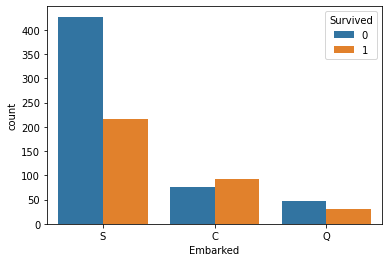

In [ ]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [ ]:
pd.pivot_table(train, index="Embarked", values="Fare")

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


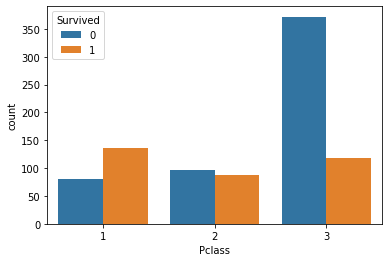

In [ ]:
sns.countplot(data=train, x="Pclass", hue="Survived")

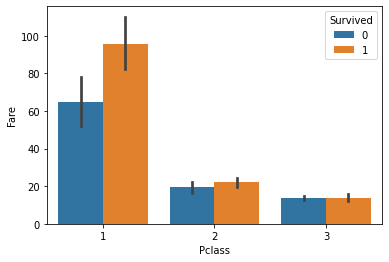

In [ ]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")
# Y축은 수치형 데이터만 가능 -> x축 항목별 y축의 평균을 표시
# 막대그래프 위의 검은 선 : 신뢰구간

**pointplot**
* bar plot과 사용법이 동일함
* X축 값들이 서로 순서 상의 연관성이 있을 땐 point plot을 사용 
* ex. 시간당 매출액의 변화량

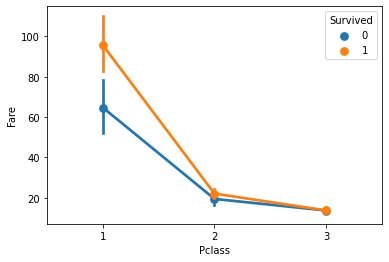

In [ ]:
sns.pointplot(data=train, x="Pclass", y="Fare", hue="Survived")

## lmplot

* x, y축에 연속형 데이터가 들어갈 때 lmplot 사용
* 추세선은 잘 쓰이지 않음 (없애는 걸 권장)
<br>→ 얻을 수 있는 정보도 별로 없고 그리는 데 시간 오래 걸림
* outlier 발견하기 쉽다

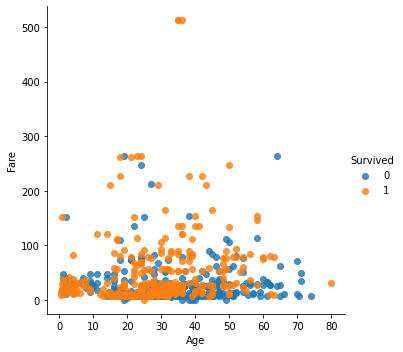

In [ ]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

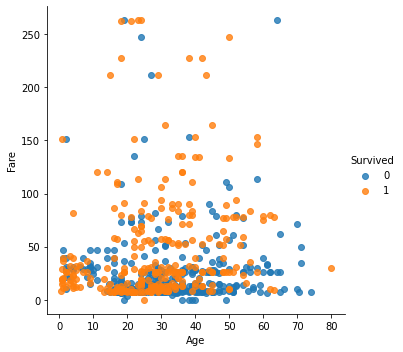

In [ ]:
## 이상치 제외
low_fare = train["Fare"] < 500
sns.lmplot(data=train[low_fare], x="Age", y="Fare", hue="Survived", fit_reg=False)

## distplot

* 수치형 데이터의 분포를 시각화
* 이론적으로 정규분포에 근사해야 하나, 실제 그렇지 않은 경우 많음
<br>→ 그 이유를 파고들어야!


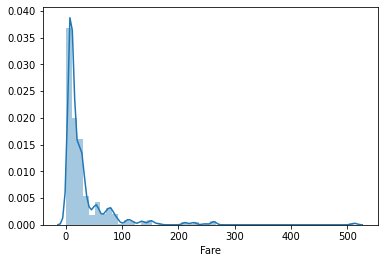

In [ ]:
sns.distplot(train["Fare"])

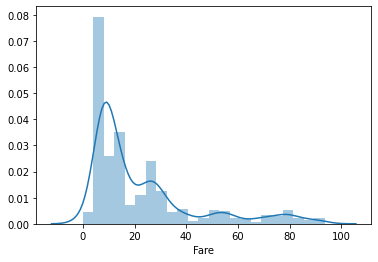

In [ ]:
## 이상치(?) 제외
low_fare = train[train["Fare"] < 100]
sns.distplot(low_fare["Fare"])

위 그래프에서 왜 정규분포가 나타나지 않는 걸까? (+ 봉우리도 여러 개)<br><br>
가설: Pclass마다 운임요금의 분포가 달라서일 것이다.

## 그외의 시각화

seaborn 홈페이지에서 시각화 종류 검색!<br>
https://seaborn.pydata.org/examples/index.html

# 3. Decision Tree

## 데이터 불러오기

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/titanic/train.csv", index_col="PassengerId")

print(train.shape)
train.head(3)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/titanic/test.csv", index_col="PassengerId")

print(train.shape)
train.head(3)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Preprocessing

### Encode Sex

In [ ]:
train["Sex_encode"] = train["Sex"].replace("male", 0).replace("female", 1)
train[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [ ]:
test["Sex_encode"] = test["Sex"].replace("male", 0).replace("female", 1)
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


### Encode Embarked (One Hot Encoding)

**One Hot Encoding**
* 경우의 수가 3가지가 넘어가는 범주형 변수 처리
* C == [1,0,0],  S == [0,1,0],  Q ==[0,0,1]

In [ ]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 15)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,S,False,False,True
2,C,True,False,False
3,S,False,False,True
4,S,False,False,True
5,S,False,False,True


In [ ]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 14)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
892,Q,False,True,False
893,S,False,False,True
894,Q,False,True,False
895,S,False,False,True
896,S,False,False,True


### Fill in missing Fare

In [ ]:
test["Fare"] = test["Fare"].fillna(0)   # 1개밖에 없어서 걍 0을 넣어준 것
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,


### Train

**필요 데이터**
* **Feature**: 정답 맞추는 데 도움되는 데이터 (`Pclass`, `Sex`, `Fare`, ...)
* **Label**: 우리가 맞춰야 할 정답 (`Survived`)

In [ ]:
feature_names = ["Pclass", "Sex_encode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]
feature_names

['Pclass', 'Sex_encode', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [ ]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
1,3,0,7.2500,False,False,True
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,False,True
4,1,1,53.1000,False,False,True
5,3,0,8.0500,False,False,True


In [ ]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0,7.8292,False,True,False
893,3,1,7.0000,False,False,True
894,2,0,9.6875,False,True,False
895,3,0,8.6625,False,False,True
896,3,1,12.2875,False,False,True


In [ ]:
label_name = "Survived"
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Use Decision Tree

개략적인 원리만 이해하고 구현체만 잘 갖다 쓰면 됨^^

In [ ]:
## scikit-learn
from sklearn.tree import DecisionTreeClassifier

## 트리모델 가져와 쓰기 위해!
## Fare 변수는 너무 많은 가지를 만들 위험 있으므로 max_depth(최대깊이)로 제한
model = DecisionTreeClassifier(max_depth = 5)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 1) fit (데이터 사이의 패턴을 기계가 직접 분석/학습한다) -> train
# 2) predict -> test
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction = model.predict(X_test)
print(prediction.shape)
prediction[0:5]   # 리스트와 유사한 numpy의 array 객체

(418,)


array([0, 0, 0, 0, 1])

In [ ]:
submit = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/titanic/gender_submission.csv", index_col="PassengerId")
print(submit.shape)

submit["Survived"] = prediction
print(submit.shape)
submit.head()

(418, 1)
(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [ ]:
submit.to_csv("/content/drive/My Drive/Colab Notebooks/data/titanic/decision-tree.csv")